## Install polly-python

In [7]:
!sudo pip3 install polly-python 

Looking in indexes: https://pypi.org/simple, http://54.245.179.143:80/
     |████████████████████████████████| 235kB 5.9MB/s eta 0:00:01
     |████████████████████████████████| 512kB 94.3MB/s eta 0:00:01
     |████████████████████████████████| 153kB 92.2MB/s eta 0:00:01
     |████████████████████████████████| 61kB 63.1MB/s eta 0:00:01
     |████████████████████████████████| 143kB 88.9MB/s eta 0:00:01
     |████████████████████████████████| 61kB 63.2MB/s eta 0:00:01
     |████████████████████████████████| 184kB 96.6MB/s eta 0:00:01
  Found existing installation: six 1.14.0
    Uninstalling six-1.14.0:
      Successfully uninstalled six-1.14.0
  Found existing installation: python-dateutil 2.8.0
    Uninstalling python-dateutil-2.8.0:
      Successfully uninstalled python-dateutil-2.8.0
  Found existing installation: pytz 2019.3
    Uninstalling pytz-2019.3:
      Successfully uninstalled pytz-2019.3
  Found existing installation: certifi 2019.11.28
    Uninstalling certifi-2019.11.28:
 

## Import libraries

In [25]:
from polly.omixatlas import OmixAtlas
from cmapPy.pandasGEXpress.parse import parse
import os
import pandas as pd
import matplotlib.pyplot as plt
from multiprocessing import Pool

## Authentication with Polly

In [9]:
omix_atlas = OmixAtlas(os.environ['POLLY_REFRESH_TOKEN'])

## Define helper functions

In [14]:
def download_dataset(repo_id, dataset_id):
    """
    Downloads a single dataset with given repo_id and dataset_id
    """
    file_name = f"{dataset_id}.gct"
    data = omix_atlas.download_data(repo_id, dataset_id)
    url = data.get('data').get('attributes').get('download_url')
    status = os.system(f"wget -O '{file_name}' '{url}'")
    if status == 0:
        print("Downloaded data successfully")
    else:
        raise Exception("Download not successful")

## Download dataset

In [78]:
repo_id = 9
dataset_id = 'GSE45019_GPL1261'

In [79]:
download_dataset(repo_id, dataset_id)

Downloaded data successfully


## Read dataset

In [80]:
library(mapGCT)

In [81]:
%get dataset_id --from python3
dataset_id

[1] "GSE45019_GPL1261"

In [82]:
gctObj <- parse_gct(paste0(dataset_id, '.gct'))
mat <- gctObj@mat
coldata <- gctObj@cdesc
rowdata <- gctObj@rdesc

parsing as GCT v1.3

GSE45019_GPL1261.gct 20135 rows, 9 cols, 0 row descriptors, 54 col descriptors



In [83]:
dim(mat)
head(mat)

[1] 20135     9

,GSM1095896,GSM1095897,GSM1095898,GSM1095899,GSM1095900,GSM1095901,GSM1095902,GSM1095903,GSM1095904
Hspa1b,9.4638,9.6363,9.7774,3.9080,5.1467,4.4441,6.2193,5.4801,6.3518
Bex1,2.0282,2.5706,2.4281,6.6133,4.8664,6.0899,4.5032,6.8816,5.7744
Cela1,7.1627,7.1200,6.9913,10.9361,9.3549,10.4849,8.9026,9.2382,8.6324
Klhl13,2.3377,2.6721,2.1105,5.0000,4.1374,4.4061,2.5317,3.8520,4.0626
Spta1,4.5883,4.9807,4.6830,5.1991,7.1593,6.3308,7.1167,7.5556,7.4062
Dsp,7.6830,7.5194,7.8618,6.5988,5.1623,6.1517,3.8372,5.0596,5.0207


In [84]:
dim(coldata)
head(coldata)

[1]  9 55

,id,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,⋯,kw_curated_tissue,kw_curated_genetic_mod_type,kw_curated_modified_gene,curated_min_age,curated_max_age,curated_age_unit,kw_curated_gender,curated_is_control,curated_cohort_id,curated_cohort_name
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>
GSM1095896,GSM1095896,CTL replicate 1,GSM1095896,Public on Nov 05 2013,Mar 11 2013,Feb 04 2016,RNA,1,sorted mouse bone marrow cells,Mus musculus,⋯,none,wildtype,none,-666,-666,none,none,0,0,CTL
GSM1095897,GSM1095897,CTL replicate 2,GSM1095897,Public on Nov 05 2013,Mar 11 2013,Feb 04 2016,RNA,1,sorted mouse bone marrow cells,Mus musculus,⋯,none,wildtype,none,-666,-666,none,none,0,0,CTL
GSM1095898,GSM1095898,CTL replicate 3,GSM1095898,Public on Nov 05 2013,Mar 11 2013,Feb 04 2016,RNA,1,sorted mouse bone marrow cells,Mus musculus,⋯,none,wildtype,none,-666,-666,none,none,0,0,CTL
GSM1095899,GSM1095899,IDH1wt replicate 1,GSM1095899,Public on Nov 05 2013,Mar 11 2013,Feb 04 2016,RNA,1,sorted mouse bone marrow cells,Mus musculus,⋯,none,wildtype,none,-666,-666,none,none,0,2,IDH1wt; IDH1wt
GSM1095900,GSM1095900,IDH1wt replicate 2,GSM1095900,Public on Nov 05 2013,Mar 11 2013,Feb 04 2016,RNA,1,sorted mouse bone marrow cells,Mus musculus,⋯,none,wildtype,none,-666,-666,none,none,0,2,IDH1wt; IDH1wt
GSM1095901,GSM1095901,IDH1wt replicate 3,GSM1095901,Public on Nov 05 2013,Mar 11 2013,Feb 04 2016,RNA,1,sorted mouse bone marrow cells,Mus musculus,⋯,none,wildtype,none,-666,-666,none,none,0,2,IDH1wt; IDH1wt


In [85]:
table(coldata$curated_cohort_name)


             CTL IDH1mut; IDH1mut   IDH1wt; IDH1wt 
               3                3                3 

## Expression distribution for all samples

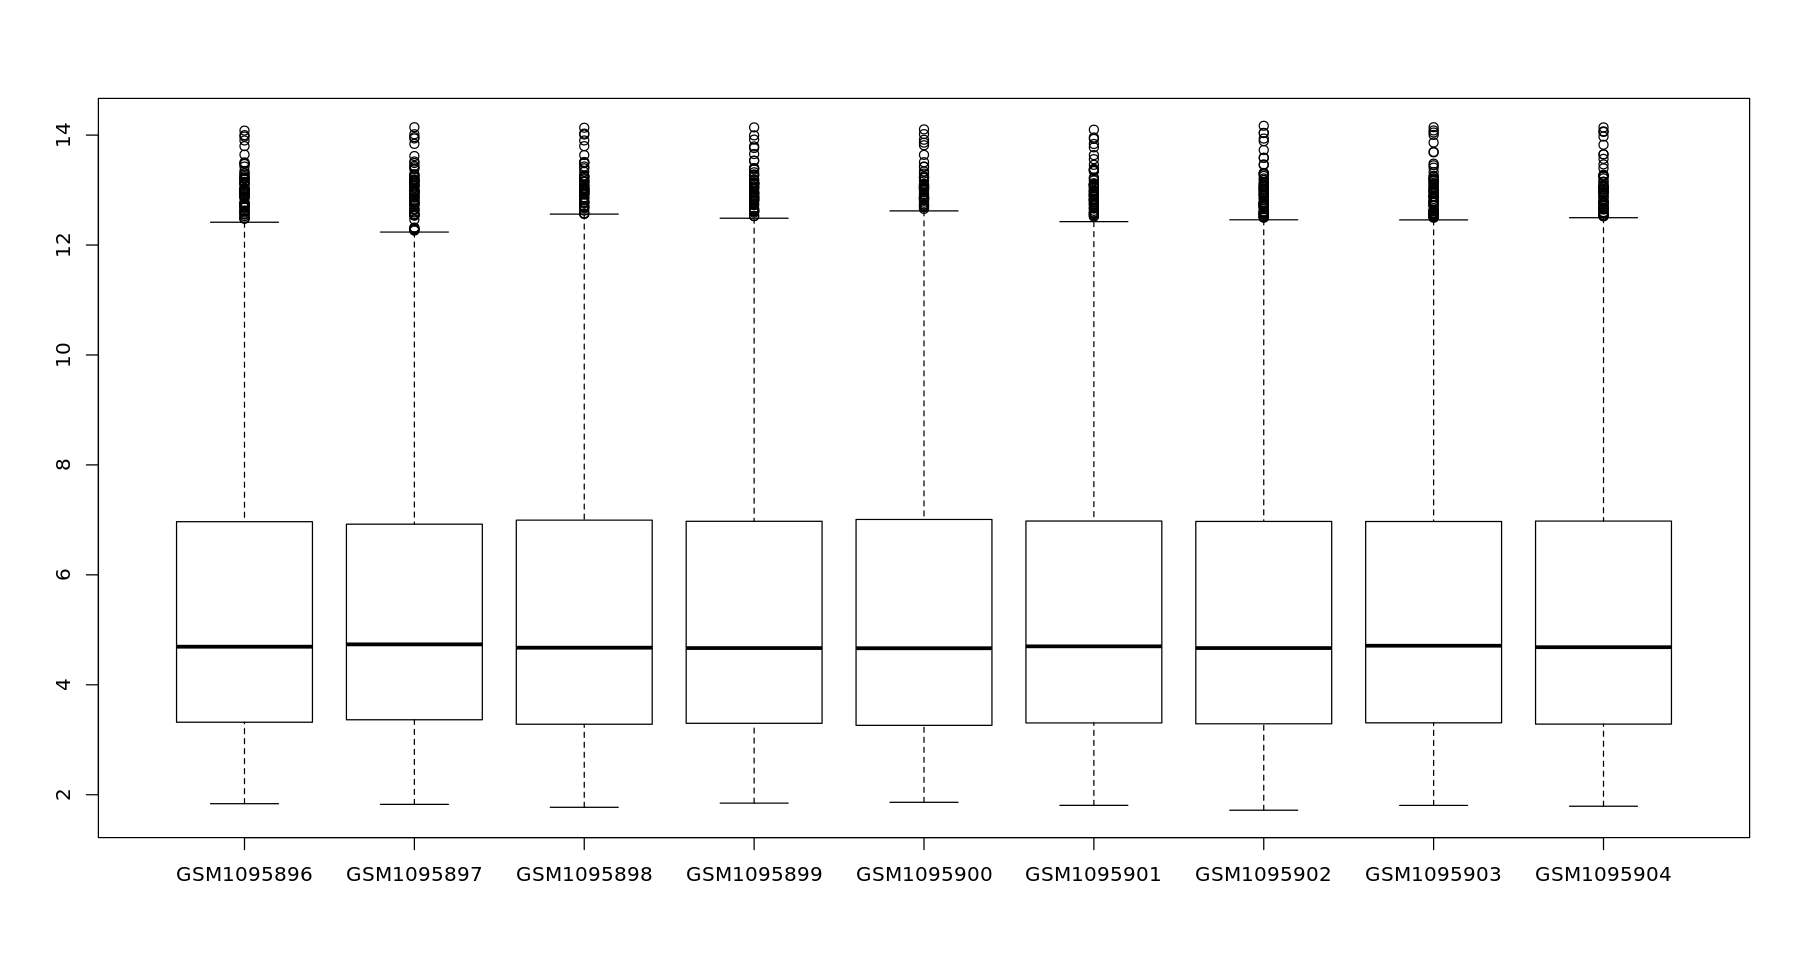

In [96]:
options(repr.plot.width=15, repr.plot.height=8)
boxplot(mat)

## PCA

In [104]:
library(ggplot2)
library(ggsci)

pca_plot <- function(input_matrix, metadata, cohort, PCx = 1, PCy = 2) {
  PCAObj <- prcomp(as.data.frame(t(input_matrix)), scale = T)
  PCAObj_Summary <- summary(PCAObj)
  PCALoadings <- data.frame(PCAObj$x, cohort = as.factor(as.character(metadata[,cohort, drop = T])))
  p <- ggplot(PCALoadings, aes(x = eval(parse(text=paste("PC", PCx, sep = ""))),
                               y = eval(parse(text=paste("PC", PCy, sep = ""))),
                               fill = cohort)) + 
    geom_point(shape = 21, size = 7, alpha = 0.7) + 
    labs(x = paste("PC",PCx, '(', round(PCAObj_Summary$importance[2,PCx]*100, 2), '%)'),
         y = paste("PC",PCy, '(', round(PCAObj_Summary$importance[2,PCy]*100, 2), '%)'), fill = "cohort") + # x and y axis labels
    scale_color_aaas() + # filling the point colors
    theme(legend.position = "right", legend.direction = "vertical", # legend positioned at the bottom, horizantal direction,
          axis.line = element_line(size=1, colour = "black"), # axis line of size 1 inch in black color
          panel.grid.major = element_blank(), # major grids included
          panel.grid.minor = element_blank(), # no minor grids
          panel.border = element_blank(), panel.background = element_blank(), # no borders and background color
          axis.title = element_text(colour="black", size = 25, face = "bold"), # axis title
          axis.text.x = element_text(colour="black", size = 20, margin=unit(c(0.5,0.5,0.1,0.1), "cm"), face = "bold"), # x-axis text in fontsize 20
          axis.text.y = element_text(colour="black", size = 20, margin=unit(c(0.5,0.5,0.1,0.1), "cm"), face = "bold"), # y-axis text in fontsize 20
          legend.text = element_text(size = 20, face = "bold"),
          legend.title = element_text(colour="black", size=22, face="bold"),
          axis.ticks.length = unit(-0.25, "cm"))
  p
}

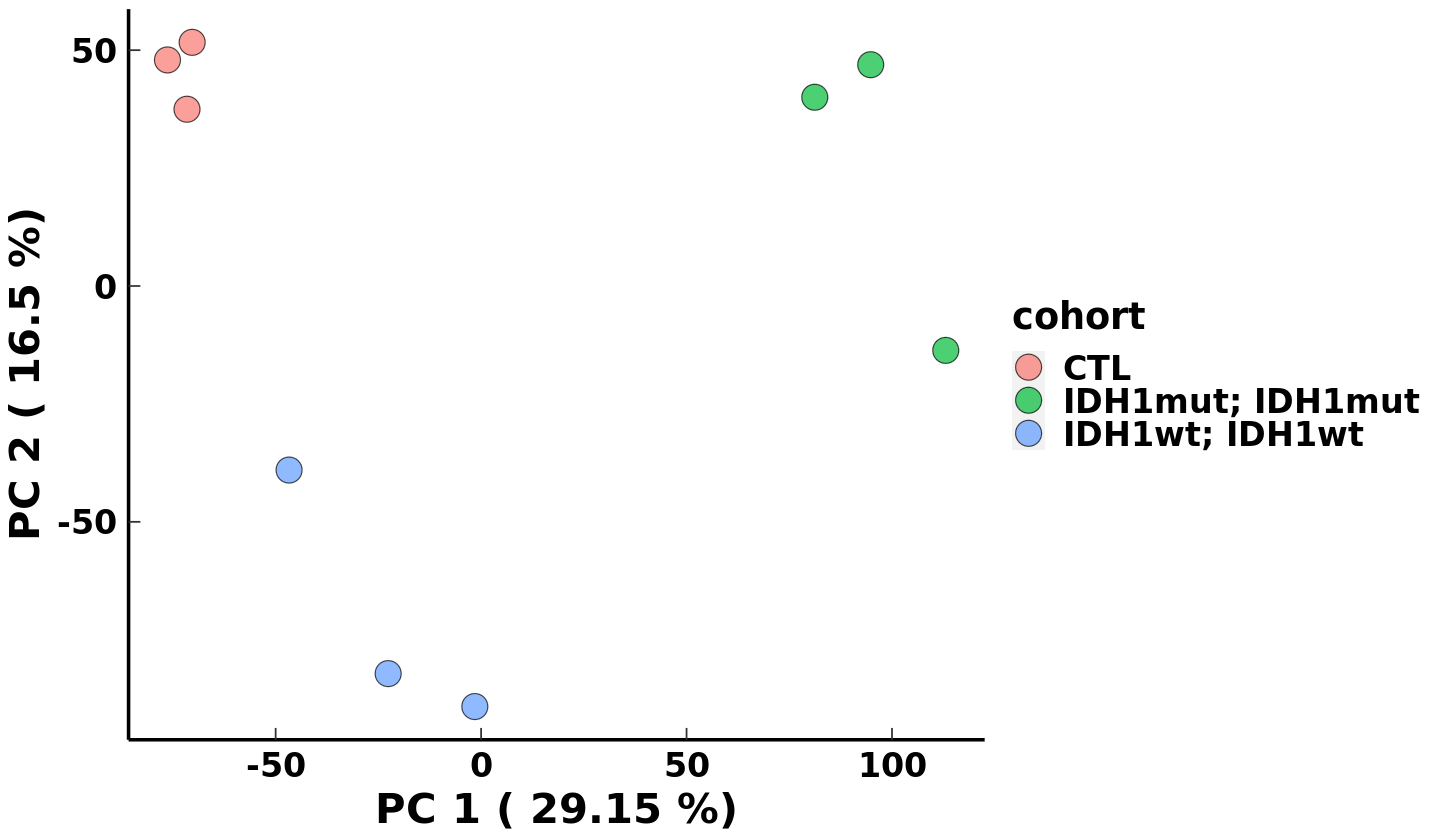

In [107]:
options(repr.plot.width=12, repr.plot.height=7)
pca_plot(mat, coldata, 'curated_cohort_name')

## Plot expression profile of a gene across cohorts

### 1. Define function to generate data for plotting

In [129]:
generate_plot_data <- function(mat, coldata, gene){
    plot_data <- reshape2::melt(as.data.frame(mat)[gene,,F])
    colnames(plot_data) <- c('sample',gene)
    plot_data <- merge(plot_data, coldata[,'curated_cohort_name',F], by.x='sample', by.y='row.names')
    plot_data
}

### 2. Define boxplot function

In [148]:
groupBoxplot <- function(df, x, y) {
  require(ggplot2)
  p <- ggplot(df, aes_string(x = x, y = y)) + 
  stat_boxplot(geom ='errorbar') + # Adding horizontal bars
  geom_boxplot(color="black", fill="#ADD8E6", alpha=0.9) + # boxplot fnuction with black borders 
  scale_y_continuous(name = y) + 
  scale_x_discrete(name = "Cohort") +        # x-axis labels
  scale_fill_brewer(palette = "Accent") +
  #labs(fill = splitBy) +
  theme(panel.grid.major = element_blank(), # no major grids
        panel.grid.minor = element_blank(), # no minor grids
        panel.border = element_blank(), # no border
        panel.background = element_blank(), # no background 
        axis.title = element_text(colour="black", size = 25, face = "bold"), # axis title 
        axis.text.x = element_text(colour="black", size = 20, margin=unit(c(0.5,0.5,0.1,0.1), "cm"), face = "bold"), # x-axis text in fontsize 10
        axis.text.y = element_text(colour="black", size = 20, margin=unit(c(0.5,0.5,0.1,0.1), "cm"), face = "bold"), # y-axis text in fontsize 10
        axis.line = element_line(size=1, colour = "black"), # axis line defined
        legend.text = element_text(size = 20, face = "bold"),
        legend.title = element_text(colour="black", size=22, face="bold"),
        axis.ticks.length = unit(-0.25, "cm")) # ticks facing inward with 0.25cm length

  p
}

### 3. Plot

In [149]:
gene_to_plot <- 'Dsp'
plot_data <- generate_plot_data(mat, coldata, gene_to_plot)
head(plot_data)

No id variables; using all as measure variables



,sample,Dsp,curated_cohort_name
,<fct>,<dbl>,<chr>
1,GSM1095896,7.6830,CTL
2,GSM1095897,7.5194,CTL
3,GSM1095898,7.8618,CTL
4,GSM1095899,6.5988,IDH1wt; IDH1wt
5,GSM1095900,5.1623,IDH1wt; IDH1wt
6,GSM1095901,6.1517,IDH1wt; IDH1wt


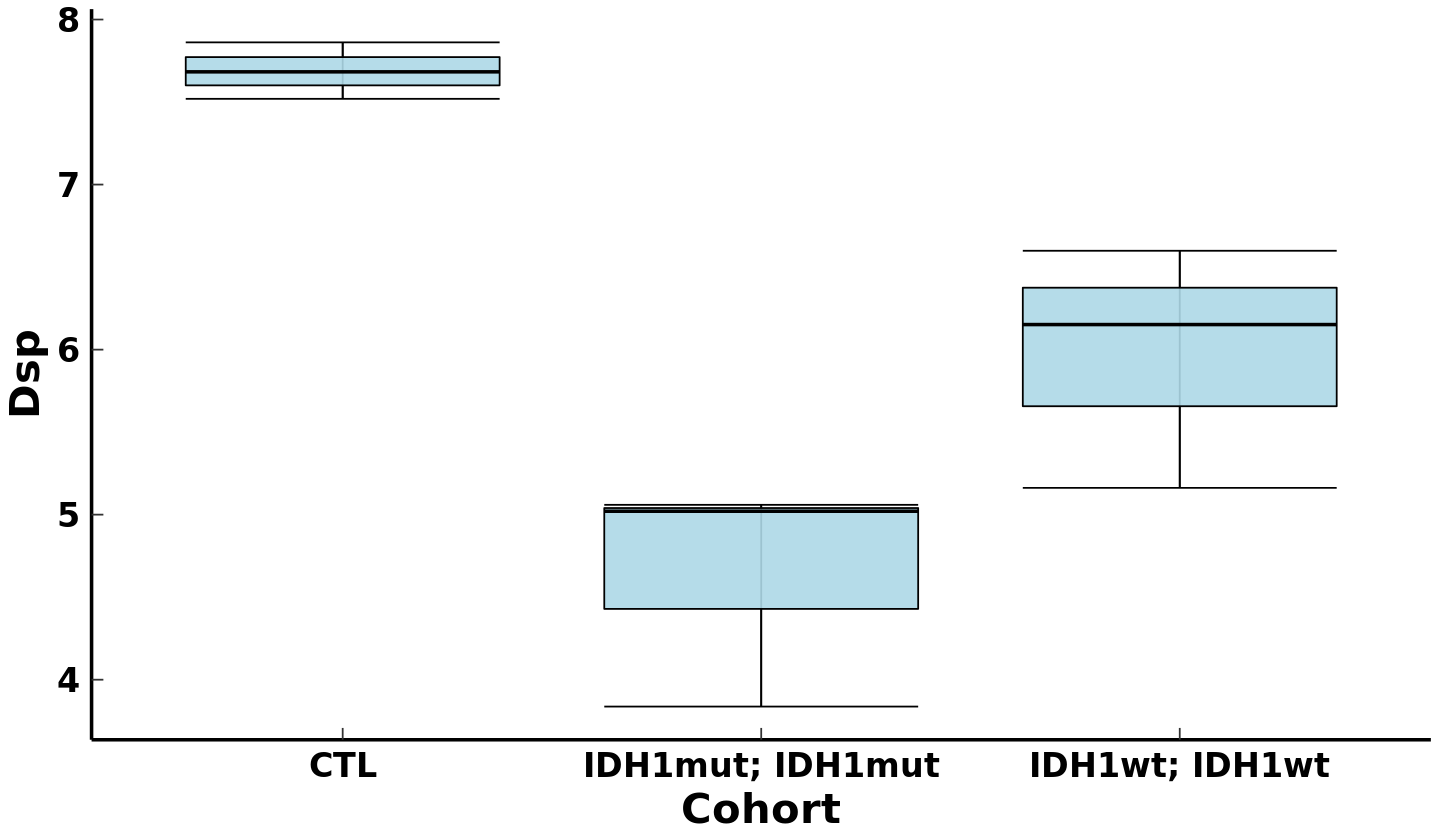

In [150]:
options(repr.plot.width=12, repr.plot.height=7)
groupBoxplot(plot_data, 'curated_cohort_name', gene_to_plot)